#Τεχνικές Εξόρυξης Δεδομένων - Εργασία 2

* Μασούρας Νικόλαος (sdi1800112)
* Σακαρέλλος Ιωάννης (sdi1800167)

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
trainLocation = r'/content/gdrive/MyDrive/Data Mining/hw2/train.csv'
trainData = pd.read_csv(trainLocation)

trainData.shape

(1166915, 11)

In [ ]:
trainData.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2575240,2,2016-04-09 08:41:59,2016-04-09 08:48:11,1,-73.976501,40.788368,-73.957657,40.782452,N,372
1,id3828278,2,2016-04-07 11:12:45,2016-04-07 11:24:24,1,-73.992310,40.769211,-73.990662,40.758137,N,699
2,id1483137,2,2016-04-15 19:53:35,2016-04-15 20:04:49,1,-73.994713,40.746391,-73.969742,40.758484,N,674
3,id0416660,2,2016-04-21 00:47:17,2016-04-21 00:53:41,1,-73.988358,40.718460,-73.951538,40.713840,N,384
4,id2363476,1,2016-01-26 18:34:23,2016-01-26 19:09:14,1,-73.992332,40.743576,-73.979309,40.678200,N,2091


In [ ]:
testLocation = r'/content/gdrive/MyDrive/Data Mining/hw2/test.csv'
testData = pd.read_csv(testLocation)

testData.shape

(291729, 9)

In [ ]:
testData.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3206885,2,2016-03-16 05:59:42,5,-73.977753,40.764610,-73.991142,40.770260,N
1,id2931797,1,2016-04-14 13:37:36,1,-73.996925,40.732578,-73.997932,40.755642,N
2,id0759548,1,2016-06-06 14:03:22,1,-74.006149,40.749966,-74.013985,40.713726,N
3,id1998257,1,2016-04-21 12:21:54,1,-73.967941,40.762707,-73.983833,40.742435,N
4,id2645175,2,2016-01-12 20:10:05,1,-73.973351,40.763561,-73.987679,40.738201,N


##Ανάλυση Δεδομένων

###Ερώτημα 1

Χρησιμοποιώντας την κλάση StandardScaler, αφαιρούμε από τα δεδομένα τα ζητούμενα outliers.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaledData = StandardScaler().fit(trainData[['trip_duration']])

trainData= trainData[trainData.trip_duration <= scaledData.mean_[0] + 2*np.sqrt(scaledData.var_[0])]

trainData= trainData[trainData.trip_duration >= scaledData.mean_[0] - 2*np.sqrt(scaledData.var_[0])]

trainData.shape

(1165250, 11)

In [ ]:
trainData.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.165250e+06,1.165250e+06,1.165250e+06,1.165250e+06,1.165250e+06,1.165250e+06,1.165250e+06
mean,1.534260e+00,1.664723e+00,-7.397346e+01,4.075090e+01,-7.397340e+01,4.075182e+01,8.370149e+02
std,4.988251e-01,1.314119e+00,6.230739e-02,3.170862e-02,6.159180e-02,3.645359e-02,6.590678e+02
min,1.000000e+00,0.000000e+00,-1.219332e+02,3.435970e+01,-1.219332e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073732e+01,-7.399133e+01,4.073592e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398175e+01,4.075408e+01,-7.397977e+01,4.075453e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076835e+01,-7.396303e+01,4.076981e+01,1.073000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,4.437194e+01,-6.133553e+01,4.392103e+01,1.155600e+04


###Ερώτημα 2

Αφαιρούμε από τα δεδομένα τα σημεία που πέφτουν έξω από την πόλη της Νέας Υόρκης.

In [ ]:
trainData = trainData[(trainData.pickup_longitude <= -73.75) & (trainData.pickup_longitude >= -74.03) & (trainData.dropoff_longitude <= -73.75) & (trainData.dropoff_longitude >= -74.03)]

trainData = trainData[(trainData.pickup_latitude <= 40.85) & (trainData.pickup_latitude >= 40.63) & (trainData.dropoff_latitude <= 40.85) & (trainData.dropoff_latitude >= 40.63)]

trainData.shape

(1149734, 11)

###Ερώτημα 3

In [ ]:
trainData['pickup_datetime'] = pd.to_datetime(trainData['pickup_datetime'])

trainData['dropoff_datetime'] = pd.to_datetime(trainData['dropoff_datetime'])

testData['pickup_datetime'] = pd.to_datetime(testData['pickup_datetime'])

In [ ]:
from datetime import time


def get_day_period(df,column,newColumn):
  values = ['Morning','Afternoon','Evening']

  condlist = [df[column].dt.time.between(time(6), time(12)),
              df[column].dt.time.between(time(12), time(16)),
              df[column].dt.time.between(time(16), time(22))]

  df[newColumn] = np.select(condlist, values,default='Late Night')

get_day_period(trainData,'pickup_datetime','pickup_day_period')

get_day_period(trainData,'dropoff_datetime','dropoff_day_period')

get_day_period(testData,'pickup_datetime','day_period')

In [ ]:
trainData['pickup_day_name'] = trainData['pickup_datetime'].dt.day_name()

trainData['dropoff_day_name'] = trainData['dropoff_datetime'].dt.day_name()

testData['day_name'] = testData['pickup_datetime'].dt.day_name()

In [ ]:
trainData['pickup_month'] = trainData['pickup_datetime'].dt.month

trainData['dropoff_month'] = trainData['dropoff_datetime'].dt.month

testData['month'] = testData['pickup_datetime'].dt.month

In [ ]:
trainData['pickup_hour'] = trainData['pickup_datetime'].dt.hour

trainData['dropoff_hour'] = trainData['dropoff_datetime'].dt.hour

testData['hour'] = testData['pickup_datetime'].dt.hour

In [ ]:
trainData['pickup_hour'] = np.where(trainData['pickup_hour'] == 0,24,trainData['pickup_hour'])

trainData['dropoff_hour'] = np.where(trainData['dropoff_hour'] == 0,24,trainData['dropoff_hour'])

testData['hour'] = np.where(testData['hour'] == 0,24,testData['hour'])

In [ ]:
trainData['year'] = trainData['pickup_datetime'].dt.year

testData['year'] = testData['pickup_datetime'].dt.year

In [ ]:
def get_season(df):
  values = ['Winter','Spring','Summer','Fall']

  condlist = [(df['pickup_datetime'].dt.month < 3) | (df['pickup_datetime'].dt.month == 12),
              (df['pickup_datetime'].dt.month  >= 3) & (df['pickup_datetime'].dt.month < 6),
              (df['pickup_datetime'].dt.month >= 6) & (df['pickup_datetime'].dt.month < 9),
              (df['pickup_datetime'].dt.month >= 9) & (df['pickup_datetime'].dt.month > 12)]
  df['season'] = np.select(condlist, values)

get_season(trainData)

get_season(testData)

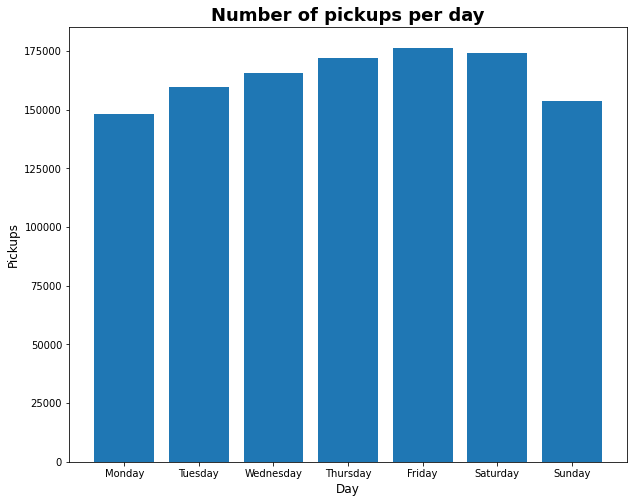

In [ ]:
pickupsPerDay = trainData.groupby(['pickup_day_name'],as_index=False).size()

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

pickupsPerDay['Day_id'] = pickupsPerDay['pickup_day_name']
pickupsPerDay['Day_id'] = pickupsPerDay['Day_id'].map(sorterIndex)
pickupsPerDay.sort_values('Day_id', inplace=True)
plt.figure(figsize=(10, 8))
plt.bar(pickupsPerDay['pickup_day_name'], pickupsPerDay['size'])

plt.xlabel("Day", fontsize=12)
plt.ylabel("Pickups", fontsize=12)
plt.title("Number of pickups per day", fontsize=18, fontweight="bold")
plt.show()

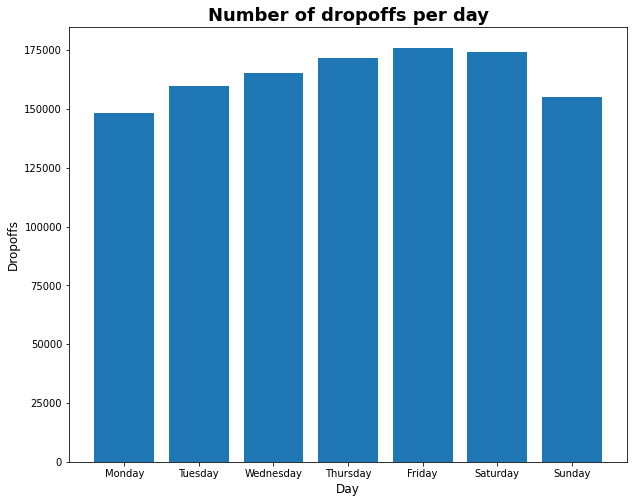

In [ ]:
dropoffsPerDay = trainData.groupby(['dropoff_day_name'],as_index=False).size()

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

dropoffsPerDay['Day_id'] = dropoffsPerDay['dropoff_day_name']
dropoffsPerDay['Day_id'] = dropoffsPerDay['Day_id'].map(sorterIndex)
dropoffsPerDay.sort_values('Day_id', inplace=True)

plt.figure(figsize=(10, 8))
plt.bar(dropoffsPerDay['dropoff_day_name'], dropoffsPerDay['size'])

plt.xlabel("Day", fontsize=12)
plt.ylabel("Dropoffs", fontsize=12)
plt.title("Number of dropoffs per day", fontsize=18, fontweight="bold")
plt.show()

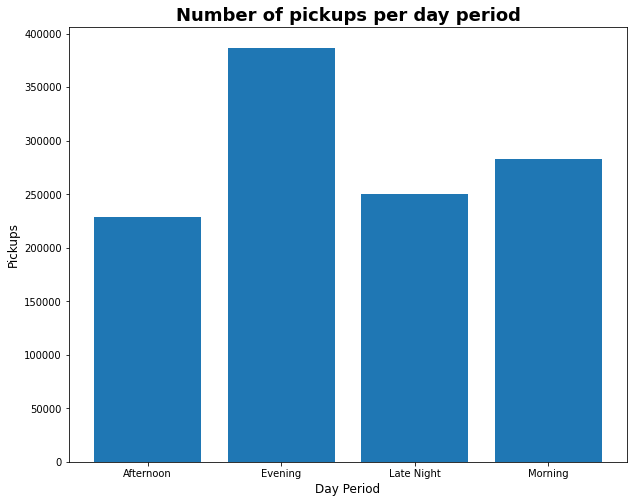

In [ ]:
pickupsPerDayPeriod = trainData.groupby(['pickup_day_period']).size()

plt.figure(figsize=(10, 8))
plt.bar(pickupsPerDayPeriod.index, pickupsPerDayPeriod)

plt.xlabel("Day Period", fontsize=12)
plt.ylabel("Pickups", fontsize=12)
plt.title("Number of pickups per day period", fontsize=18, fontweight="bold")
plt.show()

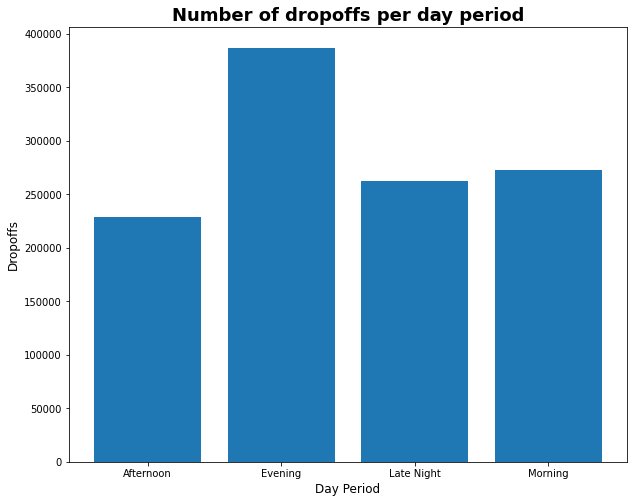

In [ ]:
dropoffsPerDayPeriod = trainData.groupby(['dropoff_day_period']).size()

plt.figure(figsize=(10, 8))
plt.bar(dropoffsPerDayPeriod.index, dropoffsPerDayPeriod)

plt.xlabel("Day Period", fontsize=12)
plt.ylabel("Dropoffs", fontsize=12)
plt.title("Number of dropoffs per day period", fontsize=18, fontweight="bold")
plt.show()

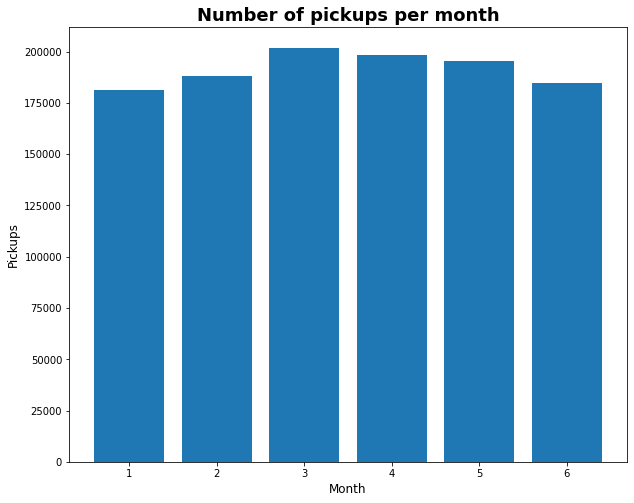

In [ ]:
pickupsPerMonth = trainData.groupby(['pickup_month']).size()

plt.figure(figsize=(10, 8))
plt.bar(pickupsPerMonth.index, pickupsPerMonth)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Pickups", fontsize=12)
plt.title("Number of pickups per month", fontsize=18, fontweight="bold")
plt.show()

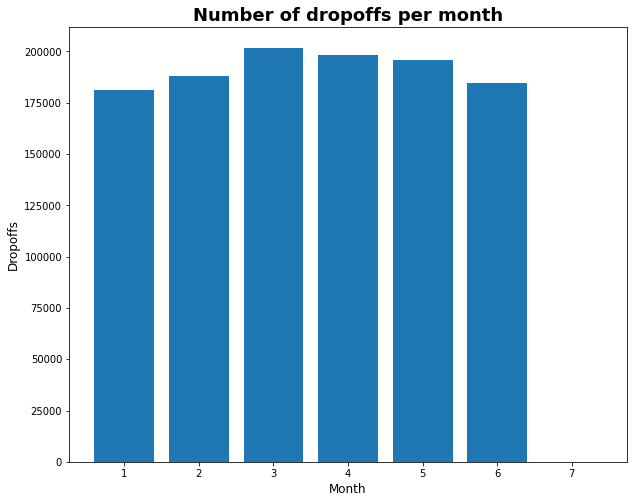

In [ ]:
dropoffsPerMonth = trainData.groupby(['dropoff_month']).size()

plt.figure(figsize=(10, 8))
plt.bar(dropoffsPerMonth.index, dropoffsPerMonth)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Dropoffs", fontsize=12)
plt.title("Number of dropoffs per month", fontsize=18, fontweight="bold")
plt.show()

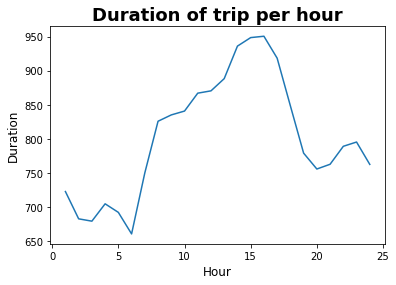

In [ ]:
trainData.groupby(['pickup_hour'])['trip_duration'].mean().plot(kind="line")
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Duration", fontsize=12)
plt.title("Duration of trip per hour", fontsize=18, fontweight="bold")
plt.show()

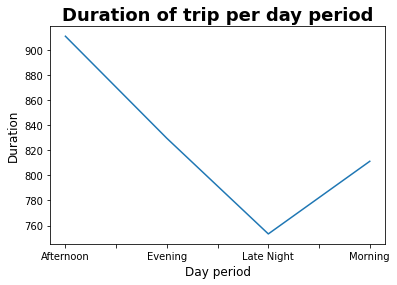

In [ ]:
trainData.groupby(['pickup_day_period'])['trip_duration'].mean().plot(kind="line")
plt.xlabel("Day period", fontsize=12)
plt.ylabel("Duration", fontsize=12)
plt.title("Duration of trip per day period", fontsize=18, fontweight="bold")
plt.show()

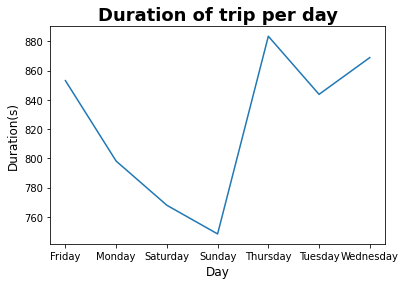

In [ ]:
trainData.groupby(['pickup_day_name'])['trip_duration'].mean().plot(kind="line")
plt.xlabel("Day", fontsize=12)
plt.ylabel("Duration(s)", fontsize=12)
plt.title("Duration of trip per day", fontsize=18, fontweight="bold")
plt.show()

###Ερώτημα 4

[]

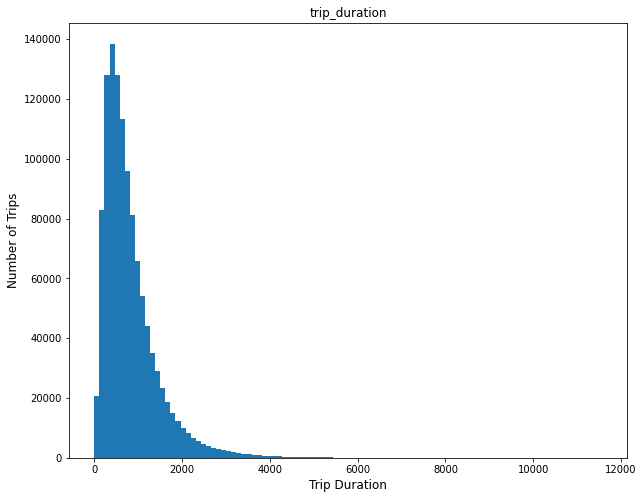

In [ ]:
hist = trainData.hist(column='trip_duration',bins=100,figsize=(10,8),grid=False)
plt.xlabel("Trip Duration", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.plot()

[]

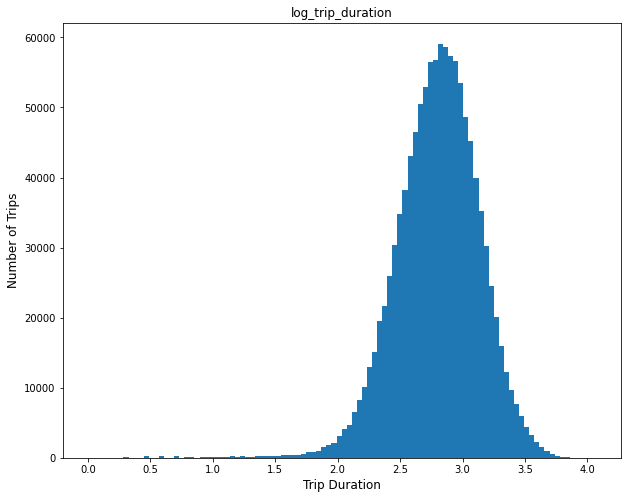

In [ ]:
trainData['log_trip_duration'] = np.log10(trainData['trip_duration'])
hist = trainData.hist(column='log_trip_duration',bins=100,figsize=(10,8),grid=False)
plt.xlabel("Trip Duration", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.plot()

###Ερώτημα 5

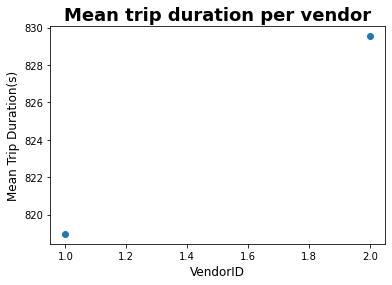

In [ ]:
total_trip_duration = trainData.groupby(['vendor_id'],as_index=False).sum()
trips_number = trainData.groupby(['vendor_id'],as_index=False).size()

mean_trip_duration = [total_trip_duration['trip_duration']/trips_number['size']]

plt.scatter(trips_number['vendor_id'],mean_trip_duration)

plt.xlabel("VendorID", fontsize=12)
plt.ylabel("Mean Trip Duration(s)", fontsize=12)
plt.title("Mean trip duration per vendor", fontsize=18, fontweight="bold")
plt.show()

###Ερώτημα 6

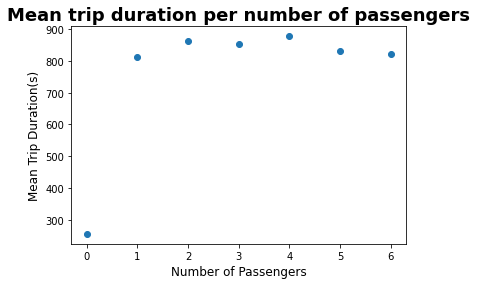

In [ ]:
total_trip_duration = trainData.groupby(['passenger_count'], as_index=False).sum()
trips_number = trainData.groupby(['passenger_count'], as_index=False).size()

mean_trip_duration = [total_trip_duration['trip_duration']/trips_number['size']]

plt.scatter(trips_number['passenger_count'], mean_trip_duration)

plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Mean Trip Duration(s)", fontsize=12)
plt.title("Mean trip duration per number of passengers", fontsize=18, fontweight="bold")
plt.show()

###Ερώτημα 7

In [ ]:
trainData['manhattan_distance'] = abs(trainData['pickup_longitude'] - trainData['dropoff_longitude']) + abs(trainData['pickup_latitude'] - trainData['dropoff_latitude'])
testData['manhattan_distance'] = abs(testData['pickup_longitude'] - testData['dropoff_longitude']) + abs(testData['pickup_latitude'] - testData['dropoff_latitude'])

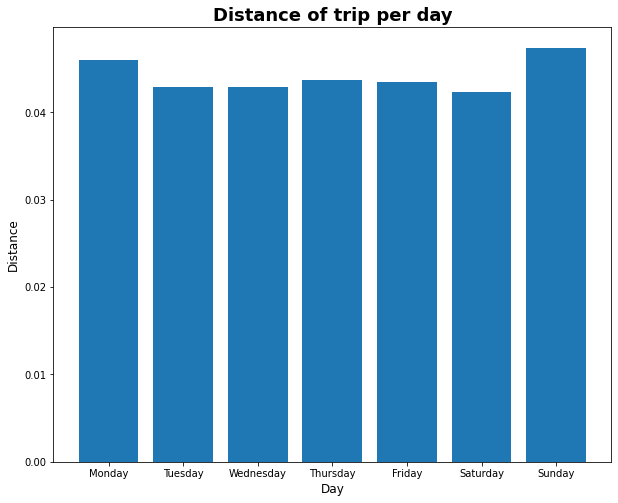

In [ ]:
distancePerDay = trainData.groupby(['pickup_day_name'],as_index=False).mean()
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

distancePerDay['Day_id'] = distancePerDay['pickup_day_name']
distancePerDay['Day_id'] = distancePerDay['Day_id'].map(sorterIndex)
distancePerDay.sort_values('Day_id', inplace=True)

plt.figure(figsize=(10, 8))
plt.bar(distancePerDay['pickup_day_name'], distancePerDay['manhattan_distance'])

plt.xlabel("Day", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.title("Distance of trip per day", fontsize=18, fontweight="bold")
plt.show()

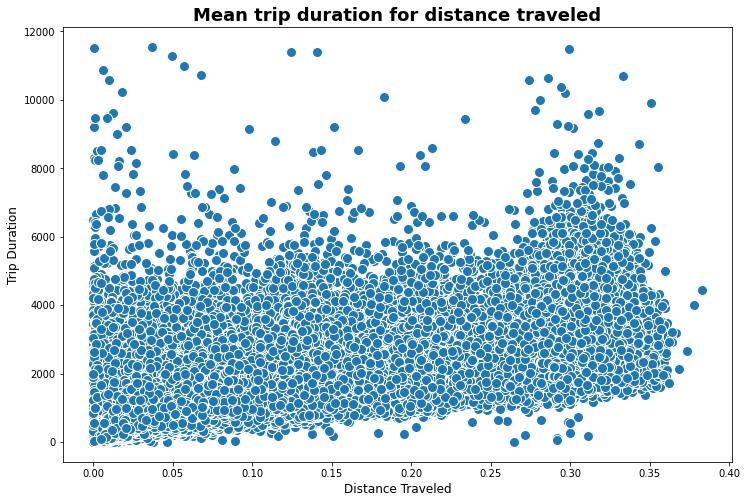

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(trainData['manhattan_distance'], trainData['trip_duration'],edgecolors='white',s=10**2)
plt.xlabel("Distance Traveled", fontsize=12)
plt.ylabel("Trip Duration", fontsize=12)
plt.title("Mean trip duration for distance traveled",fontsize=18, fontweight="bold")
plt.show()

###Ερώτημα 8

In [ ]:
trainData['mean_speed'] = trainData['manhattan_distance'] / trainData['trip_duration']

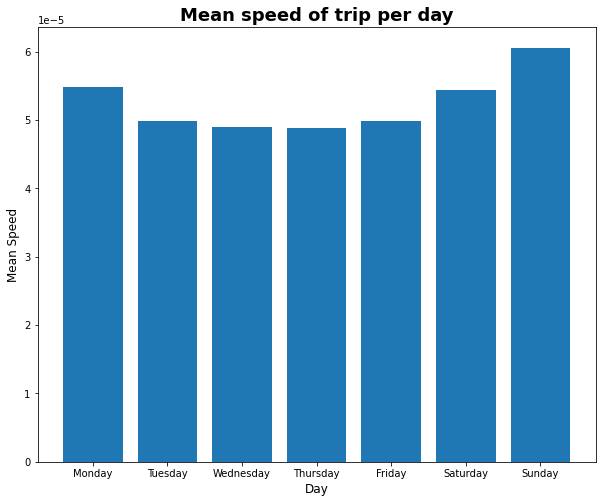

In [ ]:
meanSpeedByDay = trainData.groupby(['pickup_day_name'],as_index=False).mean()

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

meanSpeedByDay['Day_id'] = meanSpeedByDay['pickup_day_name']
meanSpeedByDay['Day_id'] = meanSpeedByDay['Day_id'].map(sorterIndex)
meanSpeedByDay.sort_values('Day_id', inplace=True)
plt.figure(figsize=(10, 8))
plt.bar(meanSpeedByDay['pickup_day_name'], meanSpeedByDay['mean_speed'])

plt.xlabel("Day", fontsize=12)
plt.ylabel("Mean Speed", fontsize=12)
plt.title("Mean speed of trip per day", fontsize=18, fontweight="bold")
plt.show()

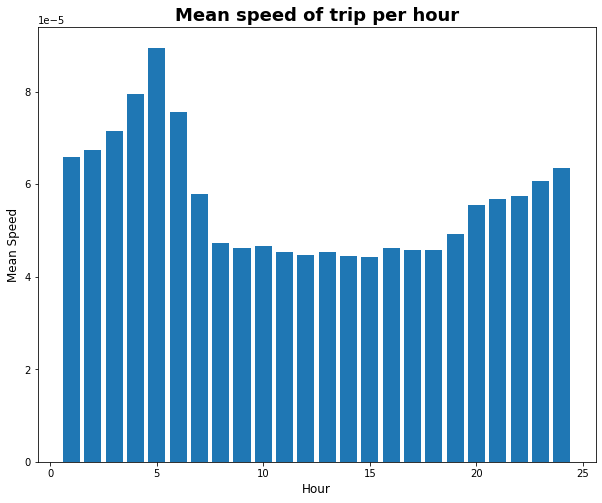

In [ ]:
meanSpeedByHour = trainData.groupby(['pickup_hour'],as_index=False).mean()

plt.figure(figsize=(10, 8))
plt.bar(meanSpeedByHour['pickup_hour'], meanSpeedByHour['mean_speed'])

plt.xlabel("Hour", fontsize=12)
plt.ylabel("Mean Speed", fontsize=12)
plt.title("Mean speed of trip per hour", fontsize=18, fontweight="bold")
plt.show()

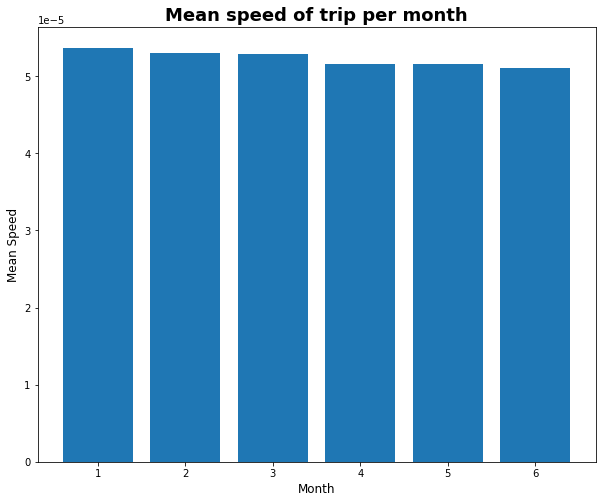

In [ ]:
meanSpeedByMonth = trainData.groupby(['pickup_month'],as_index=False).mean()

plt.figure(figsize=(10, 8))
plt.bar(meanSpeedByMonth['pickup_month'], meanSpeedByMonth['mean_speed'])

plt.xlabel("Month", fontsize=12)
plt.ylabel("Mean Speed", fontsize=12)
plt.title("Mean speed of trip per month", fontsize=18, fontweight="bold")
plt.show()

Παρατηρούμε ότι στη μέση της εβδομάδας και κυρίως τις ώρες αιχμής, η μέση ταχύτητα των ταξιδιών είναι μικρότερη από ότι συνήθως.

###Ερώτημα 9

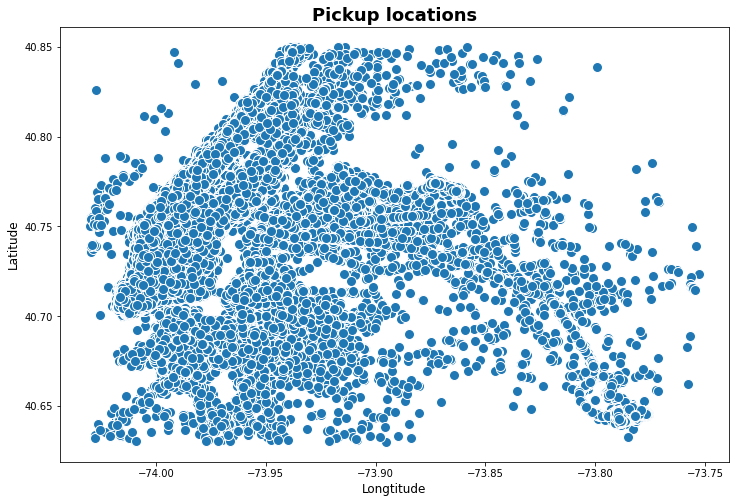

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(trainData['pickup_longitude'], trainData['pickup_latitude'],edgecolors='white',s=10**2)

plt.xlabel("Longtitude",fontsize=12)
plt.ylabel("Latitude",fontsize=12)
plt.title("Pickup locations", fontsize=18, fontweight="bold")
plt.show()

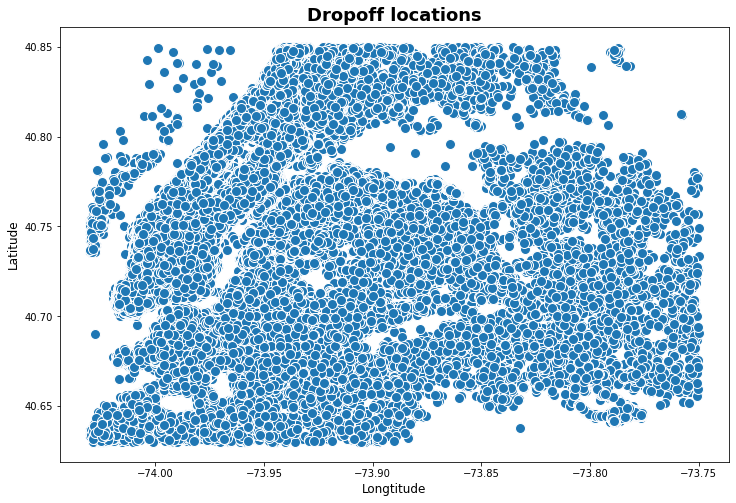

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(trainData['dropoff_longitude'], trainData['dropoff_latitude'],edgecolors='white',s=10**2)

plt.xlabel("Longtitude",fontsize=12)
plt.ylabel("Latitude",fontsize=12)
plt.title("Dropoff locations", fontsize=18, fontweight="bold")
plt.show()

##Συσταδοποίηση και πρόβλεψη διάρκειας ταξιδιού

###Ερώτημα 1

In [ ]:
from sklearn.cluster import KMeans

locations = trainData[['pickup_longitude', 'pickup_latitude']]

score = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(locations)
    score.append(kmeanModel.inertia_)

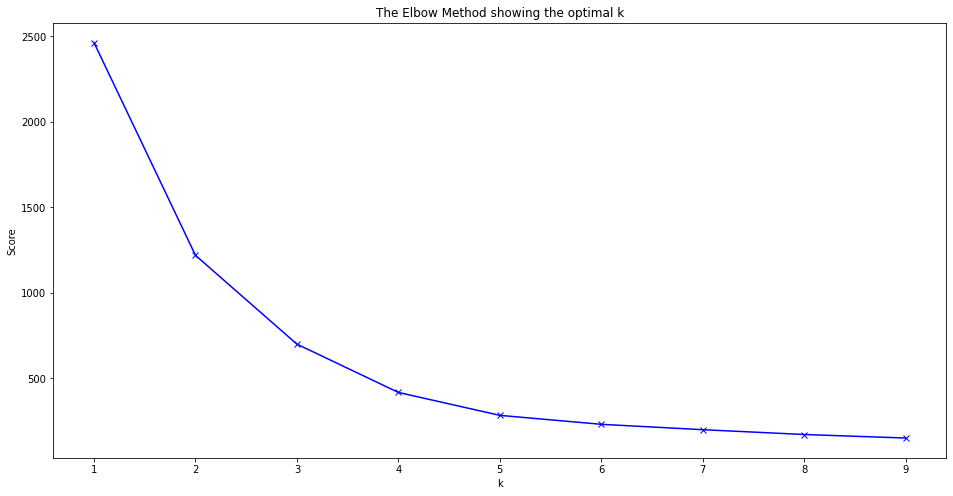

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K,score, 'bx-')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Χρησιμοποιώντας τη μέθοδο elbow βρίσκουμε ότι ο βέλτιστος αριθμός από clusters είναι 4.

In [ ]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(locations)

k_means_prediction = kmeanModel.predict(locations)

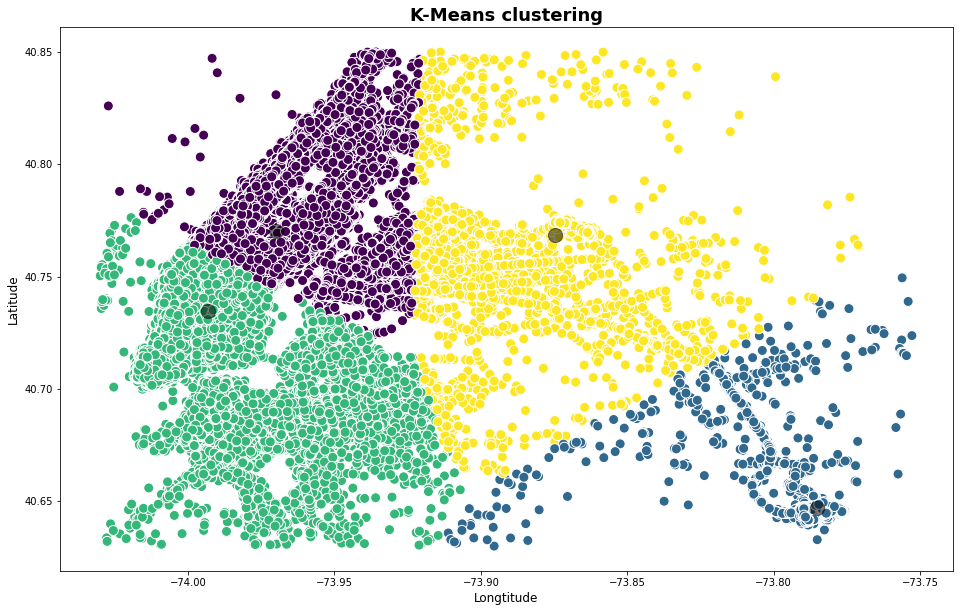

In [ ]:
centers = kmeanModel.cluster_centers_

plt.figure(figsize=(16, 10))

plt.scatter(trainData['pickup_longitude'], trainData['pickup_latitude'],c=k_means_prediction,s=10**2,edgecolors='white')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);plt.xlabel("Longtitude",fontsize=12)
plt.ylabel("Latitude",fontsize=12)
plt.title("K-Means clustering", fontsize=18, fontweight="bold")
plt.show()

###Ερώτημα 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

X_train = trainData[['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
                    'pickup_month','pickup_hour','manhattan_distance','pickup_day_name','season','pickup_day_period']]
Y_train = trainData[['log_trip_duration']]

day_mapping = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
X_train['pickup_day_name'] = X_train['pickup_day_name'].map(day_mapping)

season_mapping = {'Winter':1,'Spring':2,'Summer':3,'Fall':4}
X_train['season'] = X_train['season'].map(season_mapping)

day_period_mapping = {'Morning':1,'Afternoon':2,'Evening':3,'Late Night':4}
X_train['pickup_day_period'] = X_train['pickup_day_period'].map(day_period_mapping)

rf = RandomForestRegressor(n_estimators=100,max_depth=6).fit(X_train, Y_train['log_trip_duration'].array)

In [ ]:
X_test = testData[['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
                    'month','hour','manhattan_distance','day_name','season','day_period']]

X_test['day_name'] = X_test['day_name'].map(day_mapping)

X_test['season'] = X_test['season'].map(season_mapping)

X_test['day_period'] = X_test['day_period'].map(day_period_mapping)


Y_test = rf.predict(X_test)

In [ ]:
testData['predicted_log_trip'] = Y_test

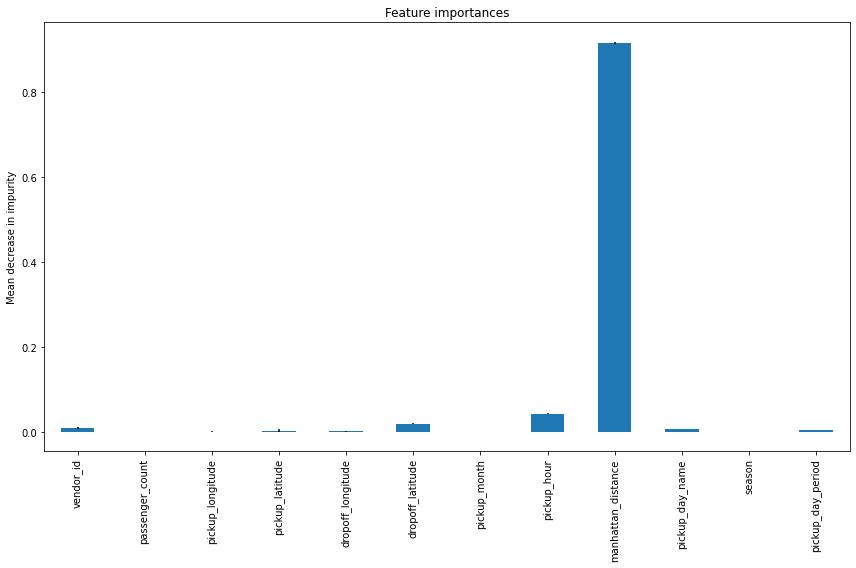

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=list(X_train.columns))

fig, ax = plt.subplots(figsize=(12, 8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Παρατηρούμε ότι το σημαντικότερο feature που επηρεάζει την πρόβλεψή μας είναι, όπως είναι λογικό, η απόσταση του ταξιδιού. Μετά από αυτό (και με πολύ μικρότερη σημασία) η ώρα του ταξιδιού επηρεάζει το αποτέλεσμα (όπως είδαμε και το ερώτημα 8 του μέρους Α).

###Ερώτημα 3

Επειδή ο όγκος των δεδομένων ήταν πολύ μεγάλος και η διαδικασία εύρεσης των βέλτιστων τιμών ήταν πολύ χρονοβόρα (>4 ώρες χωρίς αποτέλεσμα), χρησιμοποιήσαμε το 50% των δεδομένων για τον αλγόριθμο GridSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth = [2, 4, 8]
max_features = ['sqrt', 'log2', 0.3]
n_estimators = [50, 200, 500]

param_grid = {'max_depth': max_depth, 'max_features': max_features, 'n_estimators': n_estimators}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid)

In [ ]:
rf_grid.fit(X_train.head(int(len(X_train)*(50/100))), Y_train.head(int(len(Y_train)*(50/100))))

rf_grid.best_params_

{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}

Δοκιμάζοντας διάφορες τιμές για max_depth, max_features και n_estimators, βρίσκουμε ότι οι βέλτιστες τιμές είναι 8, 'log_2' και 500 αντίστοιχα.

###Ερώτημα 4

In [ ]:
rf_new = RandomForestRegressor(n_estimators=500,max_depth=8,max_features="log2").fit(X_train, Y_train['log_trip_duration'].array)

In [ ]:
Y_test_new = rf_new.predict(X_test)

testData["new_predicted_log_trip"] = Y_test_new

In [ ]:
testData.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day_period,day_name,month,hour,year,season,manhattan_distance,predicted_log_trip,new_predicted_log_trip
0,id3206885,2,2016-03-16 05:59:42,5,-73.977753,40.764610,-73.991142,40.770260,N,Late Night,Wednesday,3,5,2016,Spring,0.019039,2.576268,2.522686
1,id2931797,1,2016-04-14 13:37:36,1,-73.996925,40.732578,-73.997932,40.755642,N,Afternoon,Thursday,4,13,2016,Spring,0.024071,2.805600,2.836461
2,id0759548,1,2016-06-06 14:03:22,1,-74.006149,40.749966,-74.013985,40.713726,N,Afternoon,Monday,6,14,2016,Summer,0.044075,3.055026,2.972406
3,id1998257,1,2016-04-21 12:21:54,1,-73.967941,40.762707,-73.983833,40.742435,N,Afternoon,Thursday,4,12,2016,Spring,0.036163,2.926526,2.931435
4,id2645175,2,2016-01-12 20:10:05,1,-73.973351,40.763561,-73.987679,40.738201,N,Evening,Tuesday,1,20,2016,Winter,0.039688,2.905098,2.902016


###Ερώτημα 5

In [ ]:
targetLocation = r'/content/gdrive/MyDrive/Data Mining/hw2/target.csv'
targetData = pd.read_csv(targetLocation)

targetData['log_trip_duration'] = np.log10(targetData['trip_duration'])

In [ ]:
targetData.head()

,id,trip_duration,log_trip_duration
0,id3206885,124,2.093422
1,id2931797,1278,3.106531
2,id0759548,820,2.913814
3,id1998257,981,2.991669
4,id2645175,797,2.901458


In [ ]:
JoinedData = pd.merge(testData,targetData,on='id',how='left')

In [ ]:
JoinedData.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day_period,day_name,month,hour,year,season,manhattan_distance,predicted_log_trip,new_predicted_log_trip,trip_duration,log_trip_duration
0,id3206885,2,2016-03-16 05:59:42,5,-73.977753,40.764610,-73.991142,40.770260,N,Late Night,Wednesday,3,5,2016,Spring,0.019039,2.576268,2.522686,124,2.093422
1,id2931797,1,2016-04-14 13:37:36,1,-73.996925,40.732578,-73.997932,40.755642,N,Afternoon,Thursday,4,13,2016,Spring,0.024071,2.805600,2.836461,1278,3.106531
2,id0759548,1,2016-06-06 14:03:22,1,-74.006149,40.749966,-74.013985,40.713726,N,Afternoon,Monday,6,14,2016,Summer,0.044075,3.055026,2.972406,820,2.913814
3,id1998257,1,2016-04-21 12:21:54,1,-73.967941,40.762707,-73.983833,40.742435,N,Afternoon,Thursday,4,12,2016,Spring,0.036163,2.926526,2.931435,981,2.991669
4,id2645175,2,2016-01-12 20:10:05,1,-73.973351,40.763561,-73.987679,40.738201,N,Evening,Tuesday,1,20,2016,Winter,0.039688,2.905098,2.902016,797,2.901458


In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(JoinedData['predicted_log_trip'].array,JoinedData['log_trip_duration'].array)

mae_new = metrics.mean_absolute_error(JoinedData['new_predicted_log_trip'].array,JoinedData['log_trip_duration'].array)

mse = metrics.mean_squared_error(JoinedData['predicted_log_trip'].array,JoinedData['log_trip_duration'].array)

mse_new = metrics.mean_squared_error(JoinedData['new_predicted_log_trip'].array,JoinedData['log_trip_duration'].array)

In [ ]:
print('Metric results')
print('First prediction MAE: %.3f'%mae)
print('Second prediction MAE: %.2f'%mae_new)

print('First prediction MSE: %.2f'%mse)
print('Second prediction MSE: %.2f'%mse_new)

Metric results
First prediction MAE: 0.147
Second prediction MAE: 0.15
First prediction MSE: 0.04
Second prediction MSE: 0.05


Παρατηρούμε ότι παρά τη χρήση των βέλτιστων τιμών για τις παραμέτρους του RandomForest, οι τελικές μετρικές δε βελτιώνονται, αλλά χειροτερεύουν ελαφρώς (αυτό ίσως να συμβαίνει επειδή στο ερώτημα 3 του μέρους Β, χρησιμποιήθηκε μόνο το 50% των δεδομένων).